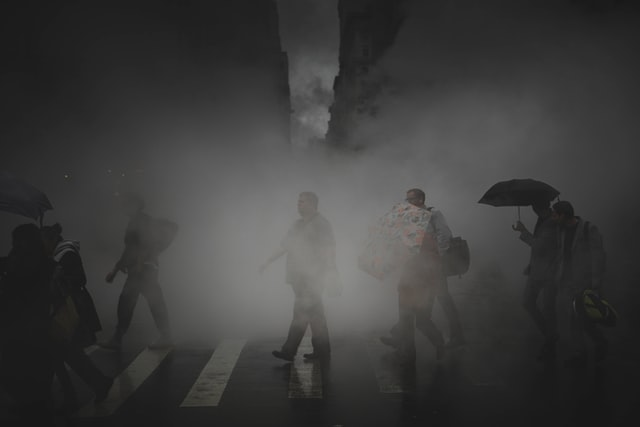

##### Photo by S. on Unsplash

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
df_train = pd.read_csv('../input/tabular-playground-series-mar-2022/train.csv', index_col = 'row_id')
df_test = pd.read_csv('../input/tabular-playground-series-mar-2022/test.csv', index_col = 'row_id')

In [ ]:
df_train.time = pd.to_datetime(df_train.time)
df_test.time = pd.to_datetime(df_test.time)

In [ ]:
for df in [df_train, df_test]:
    df['weekday'] = df.time.dt.weekday
    df['hour'] = df.time.dt.hour
    df['minute'] = df.time.dt.minute

In [ ]:
df_train.head()

In [ ]:
X = df_train.drop(columns = ['congestion','time'])
y = df_train['congestion']
X = pd.get_dummies(X)
df_test = df_test.drop(columns = 'time')
df_test = pd.get_dummies(df_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
model = xgb.XGBRegressor(n_estimators=999)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, predictions)

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(df_test)

In [ ]:
sample = pd.read_csv('../input/tabular-playground-series-mar-2022/sample_submission.csv', index_col = 'row_id')

In [ ]:
sample['congestion'] = predictions

In [ ]:
sample.to_csv('my_submission.csv')